<a href="https://colab.research.google.com/github/Abhishek416/CAD_ML/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/smote-applied.csv')
df.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1


In [ ]:
print(f"The shape of the Dataset is: {df.shape}, which means there are {df.shape[0]} rows and {df.shape[1]} columns.")

The shape of the Dataset is: (1016, 12), which means there are 1016 rows and 12 columns.


In [ ]:
# Check if any of the columns have null values
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.00000,1016.000000
mean,53.225218,132.135255,202.762623,0.220275,137.648596,0.83906,0.500000
std,9.334498,18.118534,106.824466,0.411425,25.229904,1.04448,0.500246
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.60000,0.000000
25%,46.640134,120.000000,179.750000,0.000000,120.000000,0.00000,0.000000
50%,54.000000,130.000000,224.000000,0.000000,140.000000,0.40000,0.500000
75%,60.000000,140.000000,268.000000,0.000000,157.000000,1.50000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.20000,1.000000


In [ ]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df.corr(), fmt='.2f', annot=True);

In [ ]:
#tranforming categorical data to numerical
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
for column in df:
    df[column] = labelencoder.fit_transform(df[column])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,19,1,1,103,220,0,1,178,0,10,2,0
1,61,0,2,130,46,0,1,136,0,59,1,1
2,13,1,1,71,212,0,2,27,0,10,2,0
3,59,0,0,97,96,0,1,39,1,68,1,1
4,90,1,2,121,66,0,1,59,0,10,2,0


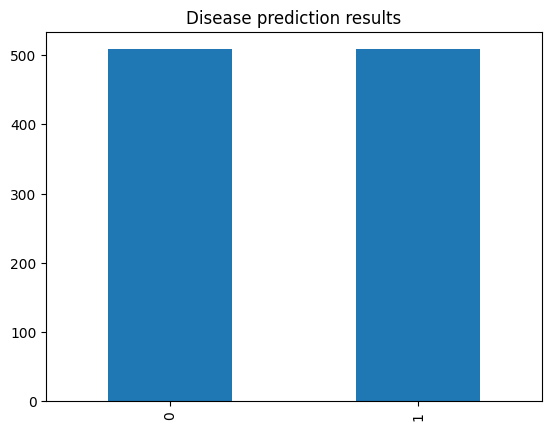

In [ ]:
df["HeartDisease"].value_counts().plot(kind='bar',
                                   title='Disease prediction results')
plt.show()

In [ ]:
#separating input and output attributes
X = df.iloc[:,:11].values
y = df.iloc[:,11:].values

In [ ]:
#splitting into testing and training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(len(X_train),len(X_test),len(y_train),len(y_test))

711 305 711 305


In [ ]:
import tensorflow as tf

In [ ]:
from keras.utils import to_categorical
num_classes = 2

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_train[0])
#print(len(y_train[0]))

(711, 2)
[0. 1.]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,SimpleRNN
from keras import optimizers
#from keras.preprocessing.sequence import pad_sequences
import numpy as np
#import numpy as np

#(samples, timesteps, features)
#(batch_size, timesteps, input_dim)
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)  #(750, 100, 1)

X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(711, 11, 1)
(305, 11, 1)


In [ ]:
num_classes=2
maxlen=11
def lstm_rnn():
    model = Sequential()
    #model.add(SimpleRNN(50, input_shape = (X_train.shape[1], X_train.shape[2],), return_sequences = False))
    model.add(SimpleRNN(50, input_shape = (maxlen,1), return_sequences = False))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.summary()

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn = lstm_rnn, epochs = 75, batch_size = 50)
model.fit(X_train, y_train)

<ipython-input-15-5adae40c88a7>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = lstm_rnn, epochs = 75, batch_size = 50)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 2,702
Trainable params: 2,702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/75


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 1s 3ms/step - loss: 0.5961 - accuracy: 0.6934
Epoch 2/75
15/15 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.7075
Epoch 3/75
15/15 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.7581
Epoch 4/75
15/15 [==============================] - 0s 3ms/step - loss: 0.5218 - accuracy: 0.7707
Epoch 5/75
15/15 [==============================] - 0s 5ms/step - loss: 0.5211 - accuracy: 0.7581
Epoch 6/75
15/15 [==============================] - 0s 5ms/step - loss: 0.4799 - accuracy: 0.8270
Epoch 7/75
15/15 [==============================] - 0s 4ms/step - loss: 0.4625 - accuracy: 0.8312
Epoch 8/75
15/15 [==============================] - 0s 5ms/step - loss: 0.4514 - accuracy: 0.8186
Epoch 9/75
15/15 [==============================] - 0s 6ms/step - loss: 0.4417 - accuracy: 0.8312
Epoch 10/75
15/15 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.8115
Epoch 11/75
15/15 [===========

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)

print(accuracy_score(y_pred, y_test_))

10/10 [==============================] - 0s 2ms/step
0.8819672131147541


Confusion Matrix:


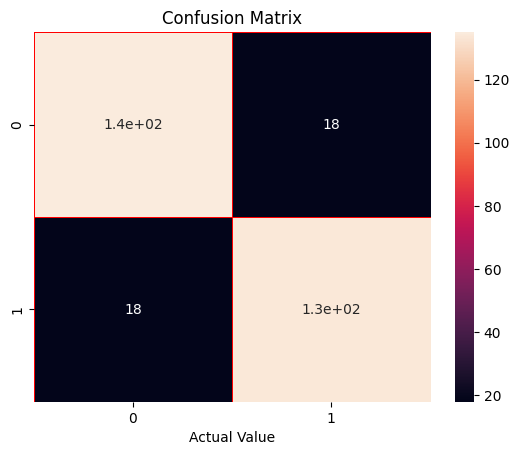

True negative 135
False positive 18
False negative 18
True positive 134
Accuracy rate: 88.197
Sensitivy/recall (TP/TP+FN): 0.88158
False positive rate (FP/FP+TN): 0.11765
False positive rate (1-specificity): 0.11765


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:")
cm6=confusion_matrix(y_test_, y_pred)
ax=plt.subplot()
sns.heatmap(cm6,annot=True,linewidth=0.5,linecolor='red',ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()
tn6, fp6, fn6, tp6 = confusion_matrix(y_test_, y_pred).ravel()
print("True negative {}".format(tn6))
print("False positive {}".format(fp6))
print("False negative {}".format(fn6))
print("True positive {}".format(tp6))
accuracy= ((float(tp6)+float(tn6))/(float(tp6)+float(tn6)+float(fp6)+float(fn6)))*100
print ('Accuracy rate: {:.3f}'.format(accuracy))
sensitivity6 = float(tp6)/(float(tp6)+float(fn6))            # proportion of true positive samples that are correctly predicted by the model
print ('Sensitivy/recall (TP/TP+FN): {:.5f}'.format(sensitivity6))
#False positive rate                                          #  specificity:proportion of true negative samples (i.e., samples from the negative class) that are correctly predicted by the model.
print ('False positive rate (FP/FP+TN): {:.5f}'.format(float(fp6)/(float(fp6)+float(tn6))))
print ('False positive rate (1-specificity): {:.5f}'.format(1-(float(tn6)/(float(tn6)+float(fp6)))))
